In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/QVI_data.csv")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


# Shop

In [ ]:
a1df = df.loc[df['LIFESTAGE'].isin(['OLDER SINGLES/COUPLES', 'OLDER FAMILIES'])]

# Select only the 'LIFESTAGE' and 'STORE_NBR' columns and create a copy
a2df = a1df[['LIFESTAGE', 'STORE_NBR']].copy()

# Print the filtered DataFrame
print(a2df)

                    LIFESTAGE  STORE_NBR
4       OLDER SINGLES/COUPLES          1
11      OLDER SINGLES/COUPLES          1
12      OLDER SINGLES/COUPLES          1
13      OLDER SINGLES/COUPLES          1
14      OLDER SINGLES/COUPLES          1
...                       ...        ...
264825  OLDER SINGLES/COUPLES         88
264826  OLDER SINGLES/COUPLES         88
264827  OLDER SINGLES/COUPLES         88
264831         OLDER FAMILIES         88
264832         OLDER FAMILIES         88

[103073 rows x 2 columns]


In [ ]:
a2df['STORE_NBR'].value_counts().head(50)

226    862
43     853
88     849
93     842
128    823
152    821
156    819
100    803
30     780
259    775
168    770
179    762
257    759
69     755
270    753
63     749
230    746
106    739
109    737
237    737
118    733
40     730
105    729
71     729
181    721
157    721
83     720
137    718
184    709
13     708
165    707
62     702
196    700
55     698
164    695
147    693
223    691
48     691
10     690
114    688
133    687
227    687
180    686
101    686
102    686
112    683
107    683
39     681
33     681
178    681
Name: STORE_NBR, dtype: int64

#Total Unique Customer

In [ ]:
df['LYLTY_CARD_NBR'].nunique()

72636

In [ ]:
df['STORE_NBR'].nunique()

272

In [ ]:
df['BRAND'].nunique()

21

In [ ]:
df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
df['DATE'].max()

'2019-06-30'

In [ ]:
df['DATE'].min()

'2018-07-01'

In [ ]:
df['PROD_QTY'].sum() / 12

42060.333333333336

#store

In [ ]:
store_df = df.loc[df['BRAND'] == 'KETTLE' ]
storebrand_df = store_df[['BRAND', 'STORE_NBR']].copy()
print(storebrand_df)

         BRAND  STORE_NBR
16      KETTLE          1
20      KETTLE          1
21      KETTLE          1
28      KETTLE          1
42      KETTLE          1
...        ...        ...
264822  KETTLE         77
264823  KETTLE         88
264824  KETTLE         88
264827  KETTLE         88
264830  KETTLE         88

[41288 rows x 2 columns]


In [ ]:
storebrand_df.value_counts()

BRAND   STORE_NBR
KETTLE  226          444
        88           429
        165          421
        40           406
        58           399
                    ... 
        244            4
        99             3
        224            2
        92             1
        206            1
Length: 265, dtype: int64

#a

In [ ]:
aw = df['LIFESTAGE'].value_counts()
aw

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [ ]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101988
Budget         93157
Premium        69689
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
premium_brand_df = df.loc[(df['PREMIUM_CUSTOMER'] == 'Premium')]
premium_berbrand_df = premium_brand_df[['PREMIUM_CUSTOMER', 'BRAND']].copy()
print(premium_berbrand_df)

       PREMIUM_CUSTOMER    BRAND
0               Premium  NATURAL
8               Premium  DORITOS
24              Premium  GRNWVES
29              Premium      RRD
30              Premium  NATURAL
...                 ...      ...
264803          Premium   SMITHS
264804          Premium   KETTLE
264806          Premium    THINS
264823          Premium   KETTLE
264830          Premium   KETTLE

[69689 rows x 2 columns]


In [ ]:
premium_berbrand_df.value_counts()

PREMIUM_CUSTOMER  BRAND     
Premium           KETTLE        10711
                  SMITHS         8433
                  DORITOS        7135
                  PRINGLES       6579
                  RRD            4837
                  WOOLWORTHS     4078
                  INFUZIONS      3729
                  THINS          3708
                  COBS           2530
                  TOSTITOS       2498
                  TWISTIES       2440
                  OLD            2396
                  GRNWVES        2047
                  NATURAL        2027
                  TYRRELLS       1664
                  CHEEZELS       1242
                  CCS            1241
                  SUNBITES        820
                  CHEETOS         765
                  BURGER          437
                  FRENCH          372
dtype: int64

In [ ]:
budget_brand_df = df.loc[(df['PREMIUM_CUSTOMER'] == 'Budget')]
budget_budbrand_df = budget_brand_df[['PREMIUM_CUSTOMER', 'BRAND']].copy()
print(budget_budbrand_df)

       PREMIUM_CUSTOMER      BRAND
2                Budget    GRNWVES
3                Budget    NATURAL
6                Budget  INFUZIONS
7                Budget        RRD
17               Budget    DORITOS
...                 ...        ...
264825           Budget   PRINGLES
264826           Budget    DORITOS
264827           Budget     KETTLE
264831           Budget   TYRRELLS
264832           Budget        OLD

[93157 rows x 2 columns]


In [ ]:
budget_budbrand_df.value_counts()

PREMIUM_CUSTOMER  BRAND     
Budget            KETTLE        14154
                  SMITHS        11548
                  DORITOS        9818
                  PRINGLES       8620
                  RRD            6480
                  WOOLWORTHS     5486
                  THINS          4931
                  INFUZIONS      4922
                  COBS           3274
                  TOSTITOS       3236
                  TWISTIES       3229
                  OLD            3203
                  NATURAL        2785
                  GRNWVES        2656
                  TYRRELLS       2195
                  CCS            1679
                  CHEEZELS       1626
                  SUNBITES       1146
                  CHEETOS        1051
                  BURGER          579
                  FRENCH          539
dtype: int64

In [ ]:
main_brand_df = df.loc[(df['PREMIUM_CUSTOMER'] == 'Mainstream')]
main_mainbrand_df = main_brand_df[['PREMIUM_CUSTOMER', 'BRAND']].copy()
print(main_mainbrand_df)

       PREMIUM_CUSTOMER       BRAND
1            Mainstream         RRD
4            Mainstream  WOOLWORTHS
5            Mainstream     CHEETOS
9            Mainstream     DORITOS
10           Mainstream         OLD
...                 ...         ...
264820       Mainstream    TOSTITOS
264824       Mainstream      KETTLE
264828       Mainstream     DORITOS
264829       Mainstream     GRNWVES
264833       Mainstream      SMITHS

[101988 rows x 2 columns]


In [ ]:
main_mainbrand_df.value_counts()

PREMIUM_CUSTOMER  BRAND     
Mainstream        KETTLE        16423
                  SMITHS        11842
                  DORITOS       11192
                  PRINGLES       9903
                  RRD            6462
                  INFUZIONS      5550
                  THINS          5436
                  WOOLWORTHS     5193
                  COBS           3889
                  TWISTIES       3785
                  TOSTITOS       3737
                  OLD            3725
                  GRNWVES        3037
                  NATURAL        2657
                  TYRRELLS       2583
                  CHEEZELS       1735
                  CCS            1631
                  CHEETOS        1111
                  SUNBITES       1042
                  BURGER          548
                  FRENCH          507
dtype: int64

#Premium

In [ ]:
premium_df = df.loc[df['PREMIUM_CUSTOMER'] == 'Premium' ]
premium_lifestage_df = premium_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(premium_lifestage_df)

       PREMIUM_CUSTOMER               LIFESTAGE
0               Premium   YOUNG SINGLES/COUPLES
8               Premium            NEW FAMILIES
24              Premium   OLDER SINGLES/COUPLES
29              Premium  MIDAGE SINGLES/COUPLES
30              Premium   YOUNG SINGLES/COUPLES
...                 ...                     ...
264803          Premium  MIDAGE SINGLES/COUPLES
264804          Premium  MIDAGE SINGLES/COUPLES
264806          Premium                RETIREES
264823          Premium   OLDER SINGLES/COUPLES
264830          Premium          YOUNG FAMILIES

[69689 rows x 2 columns]


In [ ]:
premium_lifestage_df.value_counts()

PREMIUM_CUSTOMER  LIFESTAGE             
Premium           OLDER SINGLES/COUPLES     17754
                  RETIREES                  13096
                  YOUNG FAMILIES            11563
                  OLDER FAMILIES            11190
                  MIDAGE SINGLES/COUPLES     8216
                  YOUNG SINGLES/COUPLES      6281
                  NEW FAMILIES               1589
dtype: int64

In [ ]:
lifestage_counts = premium_lifestage_df['LIFESTAGE'].value_counts()

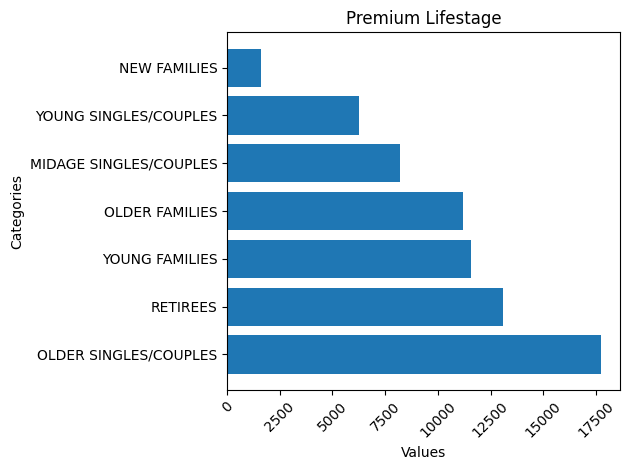

In [ ]:
lifestage_counts = premium_lifestage_df['LIFESTAGE'].value_counts()
plt.barh(lifestage_counts.index, lifestage_counts.values)


plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Premium Lifestage')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [ ]:
premium_food_df = df.loc[(df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Premium')]
premium_foodfood_df = premium_food_df[['LIFESTAGE', 'BRAND']].copy()
print(premium_foodfood_df)

                    LIFESTAGE       BRAND
24      OLDER SINGLES/COUPLES     GRNWVES
83      OLDER SINGLES/COUPLES      KETTLE
104     OLDER SINGLES/COUPLES    PRINGLES
108     OLDER SINGLES/COUPLES     DORITOS
109     OLDER SINGLES/COUPLES  WOOLWORTHS
...                       ...         ...
264779  OLDER SINGLES/COUPLES    CHEEZELS
264780  OLDER SINGLES/COUPLES      SMITHS
264790  OLDER SINGLES/COUPLES     DORITOS
264797  OLDER SINGLES/COUPLES         OLD
264823  OLDER SINGLES/COUPLES      KETTLE

[17754 rows x 2 columns]


In [ ]:
premium_foodfood_df.value_counts()

LIFESTAGE              BRAND     
OLDER SINGLES/COUPLES  KETTLE        2947
                       SMITHS        2042
                       DORITOS       1958
                       PRINGLES      1744
                       RRD           1071
                       THINS          997
                       INFUZIONS      960
                       WOOLWORTHS     886
                       TOSTITOS       660
                       TWISTIES       657
                       OLD            653
                       COBS           631
                       GRNWVES        537
                       NATURAL        451
                       TYRRELLS       413
                       CHEEZELS       342
                       CCS            259
                       CHEETOS        191
                       SUNBITES       171
                       FRENCH          95
                       BURGER          89
dtype: int64

#Budget

In [ ]:
premium_food_df = df.loc[(df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES') & (df['PREMIUM_CUSTOMER'] == 'Premium')]
premium_foodfood_df = premium_food_df[['LIFESTAGE', 'BRAND']].copy()
print(premium_foodfood_df)

                    LIFESTAGE       BRAND
24      OLDER SINGLES/COUPLES     GRNWVES
83      OLDER SINGLES/COUPLES      KETTLE
104     OLDER SINGLES/COUPLES    PRINGLES
108     OLDER SINGLES/COUPLES     DORITOS
109     OLDER SINGLES/COUPLES  WOOLWORTHS
...                       ...         ...
264779  OLDER SINGLES/COUPLES    CHEEZELS
264780  OLDER SINGLES/COUPLES      SMITHS
264790  OLDER SINGLES/COUPLES     DORITOS
264797  OLDER SINGLES/COUPLES         OLD
264823  OLDER SINGLES/COUPLES      KETTLE

[17754 rows x 2 columns]


In [ ]:
premium_df = df.loc[df['PREMIUM_CUSTOMER'] == 'Premium' ]
premium_lifestage_df = premium_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(premium_lifestage_df)

# Kettle is the most brand buyed

In [ ]:
df['BRAND'].value_counts()

KETTLE        41288
SMITHS        31823
DORITOS       28145
PRINGLES      25102
RRD           17779
WOOLWORTHS    14757
INFUZIONS     14201
THINS         14075
COBS           9693
TOSTITOS       9471
TWISTIES       9454
OLD            9324
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: BRAND, dtype: int64

In [ ]:
kettle_df = df.loc[df['BRAND'] == 'KETTLE' ]
premium_kettle_df = kettle_df[['BRAND', 'PREMIUM_CUSTOMER']].copy()
print(premium_kettle_df)

         BRAND PREMIUM_CUSTOMER
16      KETTLE       Mainstream
20      KETTLE       Mainstream
21      KETTLE       Mainstream
28      KETTLE           Budget
42      KETTLE          Premium
...        ...              ...
264822  KETTLE           Budget
264823  KETTLE          Premium
264824  KETTLE       Mainstream
264827  KETTLE           Budget
264830  KETTLE          Premium

[41288 rows x 2 columns]


In [ ]:
premium_kettle_df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    16423
Budget        14154
Premium       10711
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
ab = premium_kettle_df['PREMIUM_CUSTOMER'].value_counts()

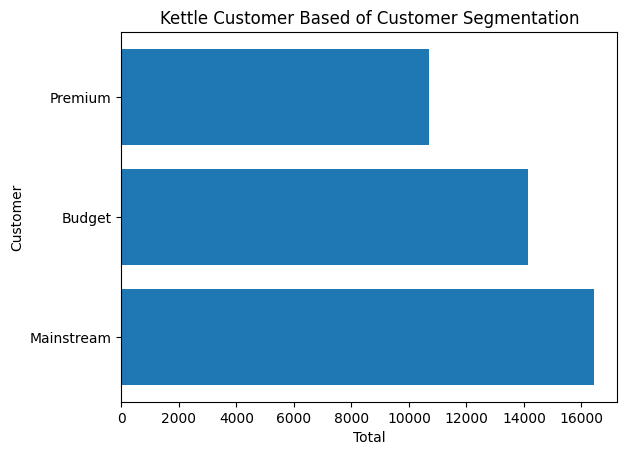

In [ ]:
plt.barh(ab.index, ab.values)

plt.xlabel('Total')
plt.ylabel('Customer')
plt.title('Kettle Customer Based of Customer Segmentation')


plt.show()

In [ ]:
lifestage_kettle_df = kettle_df.loc[kettle_df['PREMIUM_CUSTOMER'] == 'Mainstream' ]
premium_kettle_df = lifestage_kettle_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(premium_kettle_df)

       PREMIUM_CUSTOMER               LIFESTAGE
16           Mainstream          OLDER FAMILIES
20           Mainstream          OLDER FAMILIES
21           Mainstream   YOUNG SINGLES/COUPLES
55           Mainstream  MIDAGE SINGLES/COUPLES
56           Mainstream            NEW FAMILIES
...                 ...                     ...
264785       Mainstream   YOUNG SINGLES/COUPLES
264813       Mainstream          YOUNG FAMILIES
264814       Mainstream   OLDER SINGLES/COUPLES
264815       Mainstream   OLDER SINGLES/COUPLES
264824       Mainstream   YOUNG SINGLES/COUPLES

[16423 rows x 2 columns]


In [ ]:
premium_kettle_df.value_counts()

PREMIUM_CUSTOMER  LIFESTAGE             
Mainstream        YOUNG SINGLES/COUPLES     3844
                  RETIREES                  3386
                  OLDER SINGLES/COUPLES     2835
                  MIDAGE SINGLES/COUPLES    2136
                  OLDER FAMILIES            2019
                  YOUNG FAMILIES            1789
                  NEW FAMILIES               414
dtype: int64

Kettle adalah brand paling banyak dibeli oleh customer mainstream, dan customer mainstream itu adalah young singles/couples

In [ ]:
prem_df = df.loc[df['PREMIUM_CUSTOMER'] == 'Premium' ]
premium_prem_df = prem_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(premium_prem_df)

       PREMIUM_CUSTOMER               LIFESTAGE
0               Premium   YOUNG SINGLES/COUPLES
8               Premium            NEW FAMILIES
24              Premium   OLDER SINGLES/COUPLES
29              Premium  MIDAGE SINGLES/COUPLES
30              Premium   YOUNG SINGLES/COUPLES
...                 ...                     ...
264803          Premium  MIDAGE SINGLES/COUPLES
264804          Premium  MIDAGE SINGLES/COUPLES
264806          Premium                RETIREES
264823          Premium   OLDER SINGLES/COUPLES
264830          Premium          YOUNG FAMILIES

[69689 rows x 2 columns]


In [ ]:
premium_prem_df.value_counts()

PREMIUM_CUSTOMER  LIFESTAGE             
Premium           OLDER SINGLES/COUPLES     17754
                  RETIREES                  13096
                  YOUNG FAMILIES            11563
                  OLDER FAMILIES            11190
                  MIDAGE SINGLES/COUPLES     8216
                  YOUNG SINGLES/COUPLES      6281
                  NEW FAMILIES               1589
dtype: int64

In [ ]:
bud_df = df.loc[df['PREMIUM_CUSTOMER'] == 'Budget' ]
budget_bud_df = bud_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(budget_bud_df)

       PREMIUM_CUSTOMER              LIFESTAGE
2                Budget         YOUNG FAMILIES
3                Budget         YOUNG FAMILIES
6                Budget  YOUNG SINGLES/COUPLES
7                Budget  YOUNG SINGLES/COUPLES
17               Budget               RETIREES
...                 ...                    ...
264825           Budget  OLDER SINGLES/COUPLES
264826           Budget  OLDER SINGLES/COUPLES
264827           Budget  OLDER SINGLES/COUPLES
264831           Budget         OLDER FAMILIES
264832           Budget         OLDER FAMILIES

[93157 rows x 2 columns]


In [ ]:
budget_bud_df.value_counts()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            23160
                  YOUNG FAMILIES            19122
                  OLDER SINGLES/COUPLES     18407
                  RETIREES                  15201
                  YOUNG SINGLES/COUPLES      9242
                  MIDAGE SINGLES/COUPLES     5020
                  NEW FAMILIES               3005
dtype: int64

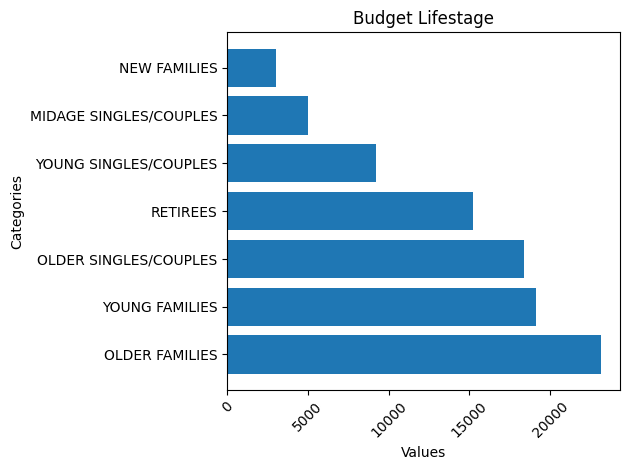

In [ ]:
lifestage_counts = budget_bud_df['LIFESTAGE'].value_counts()
plt.barh(lifestage_counts.index, lifestage_counts.values)


plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Budget Lifestage')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
abc = df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(abc)

       PREMIUM_CUSTOMER              LIFESTAGE
0               Premium  YOUNG SINGLES/COUPLES
1            Mainstream  YOUNG SINGLES/COUPLES
2                Budget         YOUNG FAMILIES
3                Budget         YOUNG FAMILIES
4            Mainstream  OLDER SINGLES/COUPLES
...                 ...                    ...
264829       Mainstream         YOUNG FAMILIES
264830          Premium         YOUNG FAMILIES
264831           Budget         OLDER FAMILIES
264832           Budget         OLDER FAMILIES
264833       Mainstream  YOUNG SINGLES/COUPLES

[264834 rows x 2 columns]


In [ ]:
wow = abc.value_counts()
wow

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            23160
Mainstream        RETIREES                  21466
                  YOUNG SINGLES/COUPLES     20854
Budget            YOUNG FAMILIES            19122
                  OLDER SINGLES/COUPLES     18407
Mainstream        OLDER SINGLES/COUPLES     18318
Premium           OLDER SINGLES/COUPLES     17754
Budget            RETIREES                  15201
Mainstream        OLDER FAMILIES            14244
Premium           RETIREES                  13096
Mainstream        YOUNG FAMILIES            12907
                  MIDAGE SINGLES/COUPLES    11874
Premium           YOUNG FAMILIES            11563
                  OLDER FAMILIES            11190
Budget            YOUNG SINGLES/COUPLES      9242
Premium           MIDAGE SINGLES/COUPLES     8216
                  YOUNG SINGLES/COUPLES      6281
Budget            MIDAGE SINGLES/COUPLES     5020
                  NEW FAMILIES               3005
Mainstrea

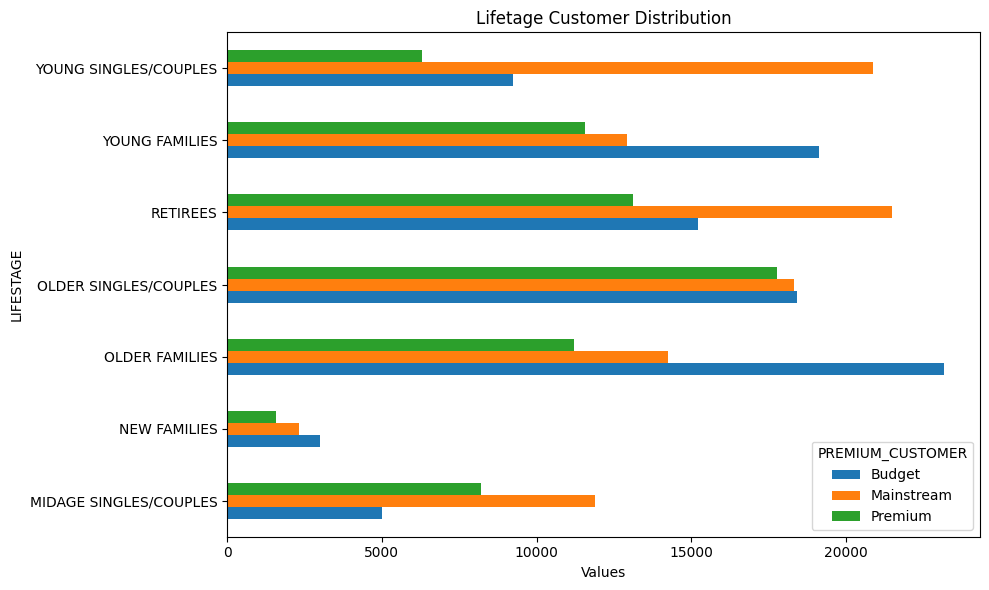

In [ ]:
wow_df = wow.to_frame(name='Values')


pivot_df = wow_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Values')


pivot_df.plot(kind='barh', figsize=(10, 6))


plt.xlabel('Values')
plt.ylabel('LIFESTAGE')
plt.title('Lifetage Customer Distribution')


plt.legend(title='PREMIUM_CUSTOMER')
plt.tight_layout()
plt.show()







In [ ]:
main_df = df.loc[df['PREMIUM_CUSTOMER'] == 'Mainstream' ]
mainstream_main_df = main_df[['PREMIUM_CUSTOMER', 'LIFESTAGE']].copy()
print(mainstream_main_df)

       PREMIUM_CUSTOMER               LIFESTAGE
1            Mainstream   YOUNG SINGLES/COUPLES
4            Mainstream   OLDER SINGLES/COUPLES
5            Mainstream  MIDAGE SINGLES/COUPLES
9            Mainstream   YOUNG SINGLES/COUPLES
10           Mainstream   YOUNG SINGLES/COUPLES
...                 ...                     ...
264820       Mainstream   OLDER SINGLES/COUPLES
264824       Mainstream   YOUNG SINGLES/COUPLES
264828       Mainstream  MIDAGE SINGLES/COUPLES
264829       Mainstream          YOUNG FAMILIES
264833       Mainstream   YOUNG SINGLES/COUPLES

[101988 rows x 2 columns]


In [ ]:
mainstream_main_df.value_counts()

PREMIUM_CUSTOMER  LIFESTAGE             
Mainstream        RETIREES                  21466
                  YOUNG SINGLES/COUPLES     20854
                  OLDER SINGLES/COUPLES     18318
                  OLDER FAMILIES            14244
                  YOUNG FAMILIES            12907
                  MIDAGE SINGLES/COUPLES    11874
                  NEW FAMILIES               2325
dtype: int64

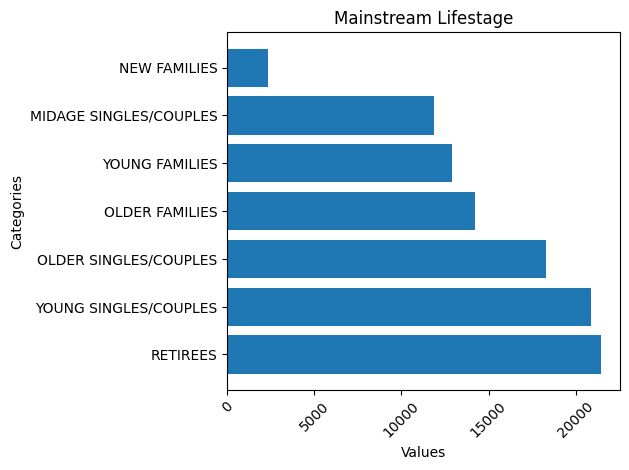

In [ ]:
lifestage_counts = mainstream_main_df['LIFESTAGE'].value_counts()
plt.barh(lifestage_counts.index, lifestage_counts.values)


plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Mainstream Lifestage')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


# Desember is month biggest buy

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['month'] = df['DATE'].dt.month

month_counts = df['month'].value_counts()

most_common_month = month_counts.idxmax()


month_name = pd.to_datetime(str(most_common_month), format='%m').strftime('%B')

print(f"The most common month is {month_name} ({most_common_month}).")

The most common month is December (12).


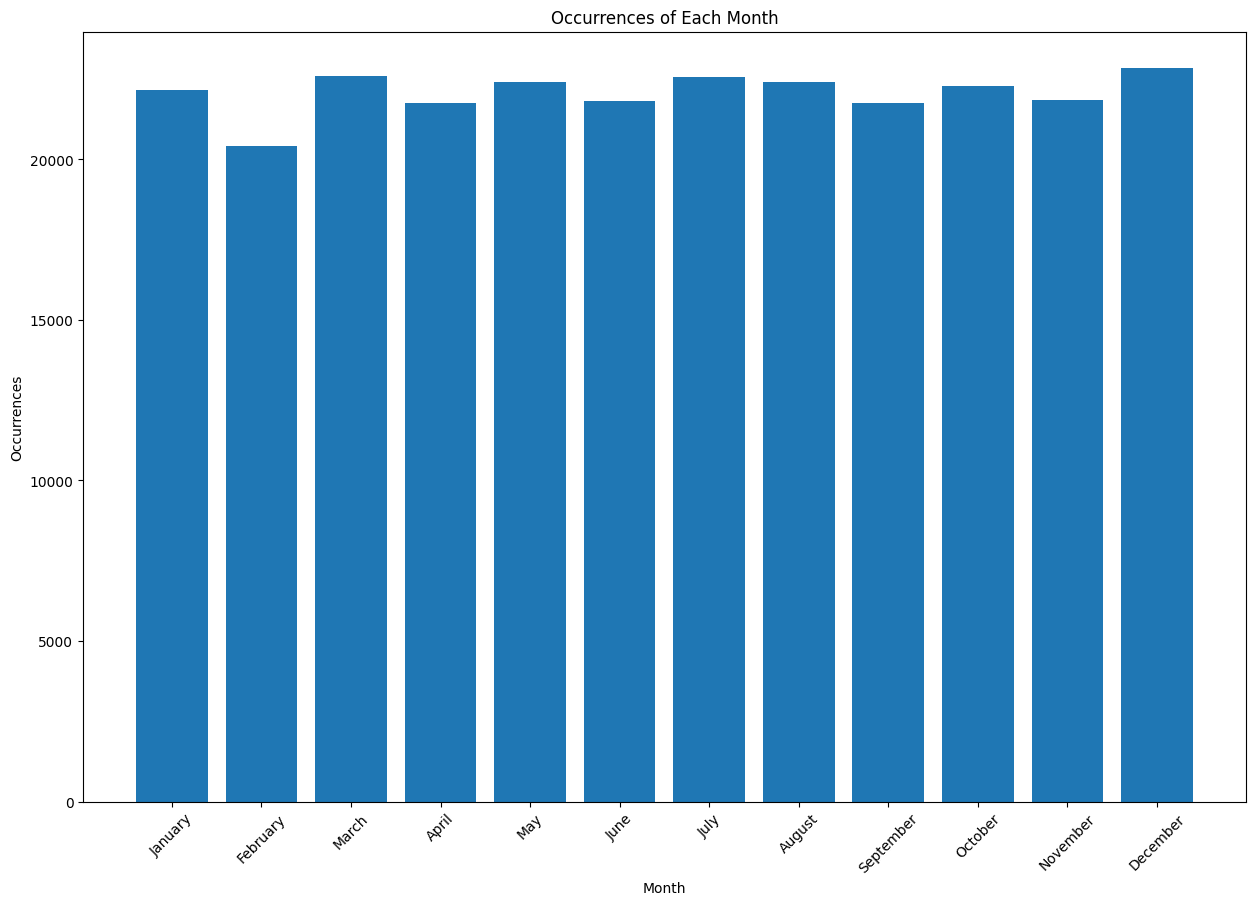

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])


df['month'] = df['DATE'].dt.month


month_counts = df['month'].value_counts()


sorted_month_counts = month_counts.sort_index()


month_names = [pd.to_datetime(str(month), format='%m').strftime('%B') for month in sorted_month_counts.index]


plt.figure(figsize=(15, 10))
plt.bar(month_names, sorted_month_counts.values)
plt.xlabel('Month')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Month')
plt.xticks(rotation=45)
plt.show()